Problem Statement:
PeerLoanKart is an NBFC (Non banking Financial Company) that facilitates peer to peer loan.
It connects people who need money (borrowers) with people who have money (investors). As an investor, you would
want to invest in people who showed a profile of having a high probability of paying you back.
You “as an ML expert” create a model that will help predict whether a borrower will pay the loan or not.

Objective:
Increase profits up to 20% as NPA will be reduced due to loan disbursal for only creditworthy borrowers

In [1]:
#import the necessary library for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [2]:
#load and read csv data
loans = pd.read_csv('loan_borrower_data.csv')
loans.head(50)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [3]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [4]:
loans.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [5]:
#replacing all dots within variable names with underscore
new_column_names = ['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid']
loans.columns = new_column_names
loans.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


EXPLORATORY DATA ANALYSIS

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [8]:
#create a copy of the dataset
df = loans.copy()

In [9]:
#obtain the descriptive statistics of the dataset
df.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [10]:
df.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

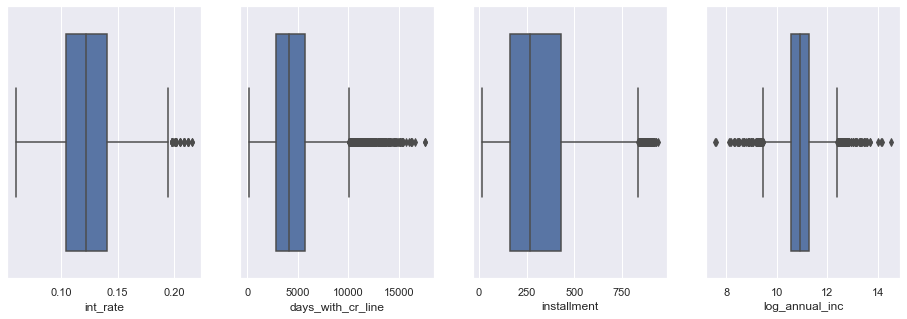

In [11]:
#from our info summary there are no missing values, hence we will check for outliers in our dataset, and if any perform outlier treatment
#we shall make a box plot of each to detect outliers
sns.set(style= 'whitegrid')
sns.set(rc={'figure.figsize':(16,5)})
f, axes = plt.subplots(1, 4)
sns.boxplot(x = df['int_rate'], ax = axes[0])
sns.boxplot(x = df['days_with_cr_line'], ax = axes[1])
sns.boxplot(x = df['installment'], ax = axes[2])
sns.boxplot(x = df['log_annual_inc'], ax = axes[3])


In [12]:
df.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

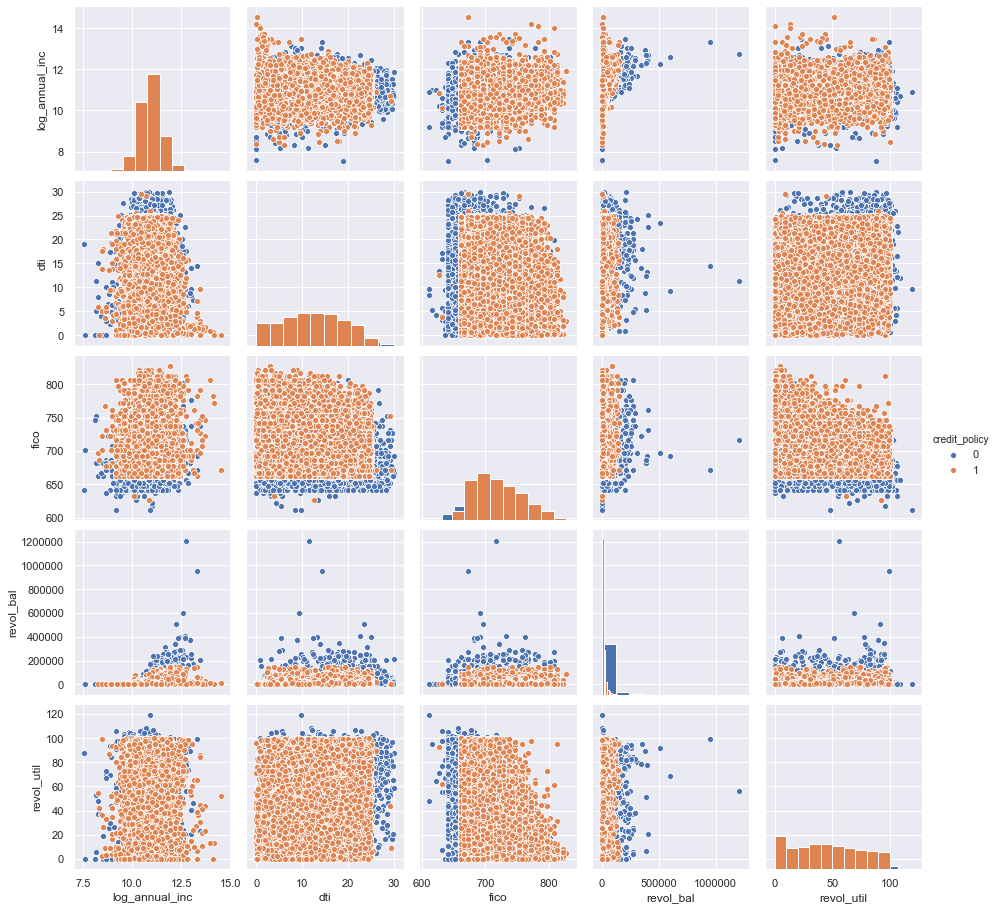

In [13]:
#making a pair plot of against other feature variables in our dataset
sliced = np.array(['credit_policy', 'log_annual_inc',
       'dti', 'fico', 'revol_bal', 'revol_util'])
df_sliced = df[sliced]
g = sns.pairplot(df_sliced, diag_kind = 'hist', hue = 'credit_policy' )

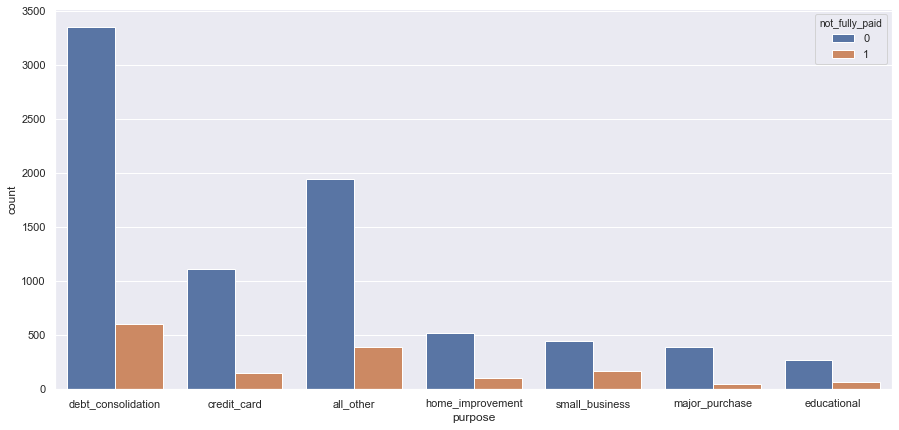

In [14]:
#making a countplot of "purpose" for which loans were requested and distinguishing between that which was fully paid back
plt.figure(figsize = (15,7))
sns.set(style="darkgrid")
sns.countplot(x = 'purpose', hue = 'not_fully_paid', data = df)

Text(0.5, 0, 'FICO')

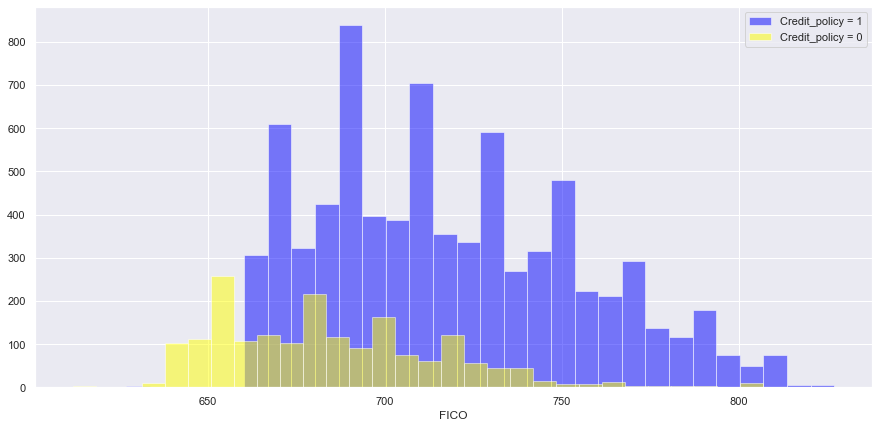

In [15]:
plt.figure(figsize = (15,7))
df[df['credit_policy']==1]['fico'].hist(alpha =0.5, color = 'blue', bins = 30, label= 'Credit_policy = 1')
df[df['credit_policy']==0]['fico'].hist(alpha =0.5, color = 'yellow', bins = 30, label= 'Credit_policy = 0')
plt.legend()
plt.xlabel('FICO')

DATA PREPROCESSING AND EXTRACTION

In [16]:
#extracting a dataset of those who are not credit-worthy and who didn't fully paid back their loans
defaulters = df.loc[(df['credit_policy'] == 0) & (df['not_fully_paid'] == 1)]
#displaying the defaulters list
defaulters

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
7711,0,debt_consolidation,0.1608,246.38,12.152144,22.47,647,7212.000000,150971,92.3,4,0,0,1
7713,0,educational,0.1640,126.40,10.308953,29.60,677,1643.000000,3043,58.5,1,0,0,1
7714,0,debt_consolidation,0.1482,242.05,10.714418,19.12,652,2847.000000,26531,52.6,33,0,0,1
7715,0,debt_consolidation,0.1482,172.89,10.645425,18.51,652,4020.000000,9792,64.0,8,0,0,1
7717,0,all_other,0.1482,311.20,11.394142,19.34,657,4139.958333,38329,77.3,0,0,0,1
7730,0,all_other,0.1154,164.98,10.915088,10.00,697,3190.000000,2447,65.5,4,0,0,1
7736,0,all_other,0.0964,208.66,9.903488,10.00,712,1139.000000,0,10.7,4,0,0,1
7738,0,all_other,0.1249,42.65,10.596635,10.00,707,5790.000000,0,51.5,8,0,0,1
7746,0,all_other,0.0838,81.94,8.779557,6.46,722,1230.041667,0,0.1,2,0,0,1
7762,0,debt_consolidation,0.1312,226.98,11.002100,13.16,672,5880.000000,5513,88.9,9,0,1,1


In [17]:
#displaying a breakdown of defaulter's list
defaulters['purpose'].value_counts()

debt_consolidation    189
all_other             145
small_business         54
credit_card            51
home_improvement       42
educational            27
major_purchase         11
Name: purpose, dtype: int64

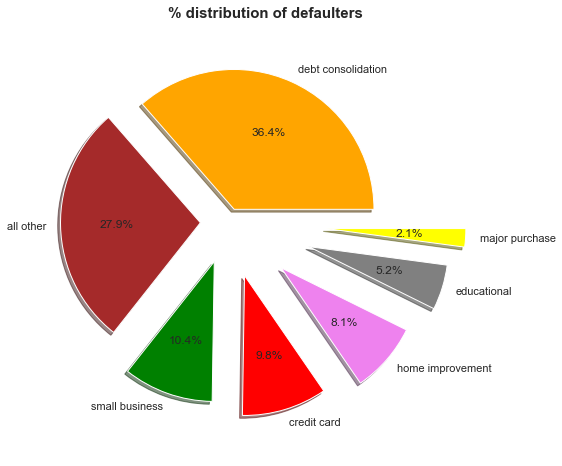

In [18]:
#creating a pie chart of defaulter's lists
labels = ['debt consolidation', 'all other', 'small business', 'credit card', 'home improvement', 'educational','major purchase']
colors = ['Orange', 'Brown', 'Green','Red', 'Violet', 'grey', 'yellow']
sizes = [189, 145, 54, 51, 42, 27, 11]
explode = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7) #'explode' all slices
plt.figure(figsize = (8,8))
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, autopct='%1.1f%%')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(' % distribution of defaulters', fontsize=15, fontweight = 'bold')
plt.show()

In [19]:
#from the boxplot above, there are a lot of outliers
#we shall obtain the inter quartile range so as to utilize it in removing the outliers
#(since outliers are values above the Q3 OR below Q1 )
Q1 = df['revol_bal'].quantile(0.25)
Q3 = df['revol_bal'].quantile(0.75)
IQR = Q3 - Q1
#next we obtain a new dataframe called filt train with the outliers removed
filtered_data = df.query('(@Q1 - 1.5*@IQR) <= revol_bal <= (@Q3 + 1.5*@IQR)')
filtered_data.shape, df.shape

((8798, 14), (9578, 14))

In [20]:
#getting dummies from purpose column and creating a new filtered data
dummy = pd.get_dummies(filtered_data['purpose'])
dummy.head()

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [21]:
new_filtered_data = pd.concat([filtered_data, dummy], axis = 1)
new_filtered_data = new_filtered_data.drop(['purpose'], axis = 1)
new_filtered_data.dtypes

credit_policy           int64
int_rate              float64
installment           float64
log_annual_inc        float64
dti                   float64
fico                    int64
days_with_cr_line     float64
revol_bal               int64
revol_util            float64
inq_last_6mths          int64
delinq_2yrs             int64
pub_rec                 int64
not_fully_paid          int64
all_other               uint8
credit_card             uint8
debt_consolidation      uint8
educational             uint8
home_improvement        uint8
major_purchase          uint8
small_business          uint8
dtype: object

In [22]:
#extracting features and target
Target = new_filtered_data['not_fully_paid'] 
features = new_filtered_data.drop(['not_fully_paid'], axis = 1)

#standardizing the feature variables 
#import standard scalar
from sklearn.preprocessing import StandardScaler
#instantiating a standard scalar object
scalar = StandardScaler()
#fit transform the feature variables
scaled_data = scalar.fit_transform(features)


#split data into test and train dataset using train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_data, Target, test_size = 0.3, random_state = 100)

In [24]:
#verifying newly formed data shapes
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6158, 19), (2640, 19), (6158,), (2640,))

DATA MODELING PHASE

In [25]:
#import machine learning model - Random forest classifier
from sklearn.ensemble import RandomForestClassifier
#instantiating the estimator
rfc = RandomForestClassifier(n_estimators= 600)
#fit the model
rfc.fit(x_train, y_train)
#creating predictions
predictions = rfc.predict(x_test)
#import classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2251
           1       0.38      0.02      0.03       389

    accuracy                           0.85      2640
   macro avg       0.61      0.51      0.47      2640
weighted avg       0.78      0.85      0.79      2640



In [26]:
#displaying the confusion matrix
print(confusion_matrix(y_test, predictions))

[[2241   10]
 [ 383    6]]


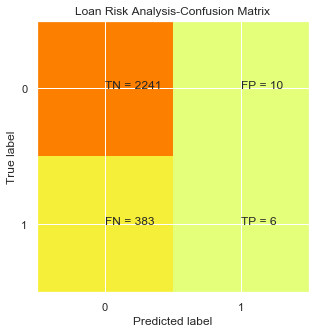

In [27]:

#compute the confusion matrix so as evaluate accuracy of our model
cm = confusion_matrix(y_test, predictions)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = [0,1]
plt.title('Loan Risk Analysis-Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In conclusion: Our model is 85% correct in predicting clients who would not fully pay of their loans or vice-versa.